<a href="https://colab.research.google.com/github/mafegiraldoduque/Proyecto-Bitacora/blob/main/ClasificadorVinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

columnas = [
    "Clase", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash",
    "Magnesium", "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
    "Proanthocyanins", "Color_Intensity", "Hue",
    "OD280/OD315", "Proline"
]

df = pd.read_csv(url, names=columnas)

df.head()


,Clase,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Dimensiones: (178, 14)

Clases:
 Clase
2    71
1    59
3    48
Name: count, dtype: int64


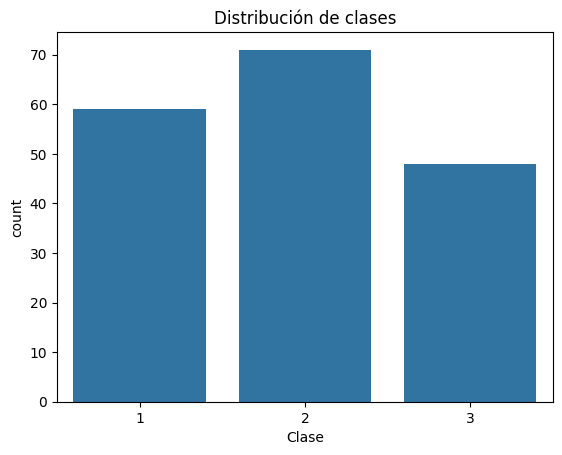

In [3]:
print("Dimensiones:", df.shape)
print("\nClases:\n", df["Clase"].value_counts())

sns.countplot(x="Clase", data=df)
plt.title("Distribución de clases")
plt.show()


In [4]:
X = df.drop("Clase", axis=1)
y = df["Clase"]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
y = pd.get_dummies(y).values


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2460 - loss: 1.1564 - val_accuracy: 0.6000 - val_loss: 0.9757
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7173 - loss: 0.9490 - val_accuracy: 0.9200 - val_loss: 0.8065
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8646 - loss: 0.7810 - val_accuracy: 0.9200 - val_loss: 0.6670
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9735 - loss: 0.6454 - val_accuracy: 0.9600 - val_loss: 0.5445
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9646 - loss: 0.5215 - val_accuracy: 1.0000 - val_loss: 0.4418
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9715 - loss: 0.3957 - val_accuracy: 1.0000 - val_loss: 0.3604
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9799 - loss: 0.3390 - val_accuracy: 1.0000 - val_loss: 0.2933
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9707 - loss: 0.2710 - val_accuracy: 1.0000 - val_loss:

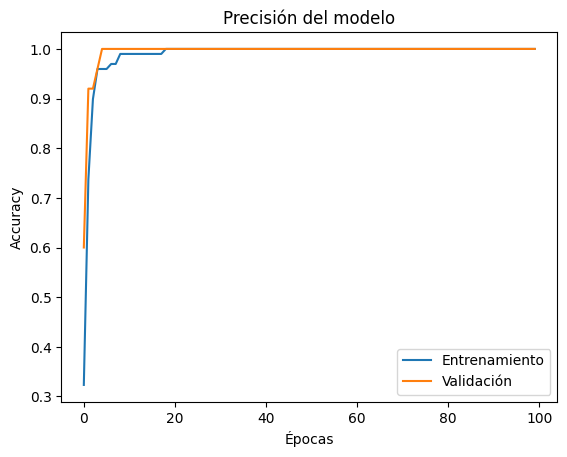

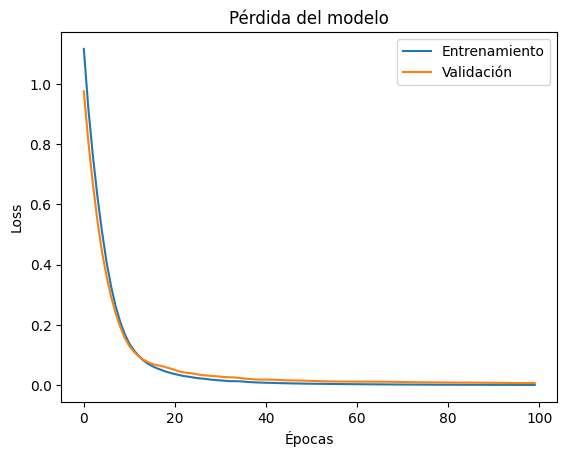

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Precisión del modelo")
plt.ylabel("Accuracy")
plt.xlabel("Épocas")
plt.legend(["Entrenamiento", "Validación"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Pérdida del modelo")
plt.ylabel("Loss")
plt.xlabel("Épocas")
plt.legend(["Entrenamiento", "Validación"])
plt.show()



In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy en test:", accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0068
Accuracy en test: 1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


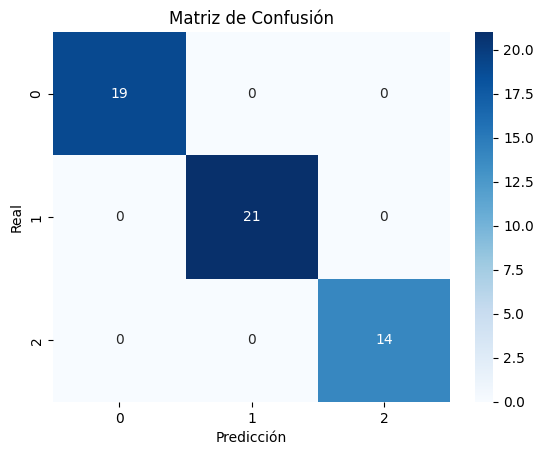

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_true, y_pred_classes))
